<a href="https://colab.research.google.com/github/PolemoniProkshitha/ai_ml/blob/main/Linear_Regression_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Dataset and Libraries
Start by importing the necessary libraries such as pandas, numpy, matplotlib, and scikit-learn.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder

Load the dataset into a pandas DataFrame.

In [ ]:
# Load dataset
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')

Explore and Preprocess the Data

Perform exploratory data analysis (EDA) to understand the dataset.
Check for missing values, data types, and basic statistics.
Handle missing data, encode categorical variables, and normalize/standardize the data if necessary.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.isnull().sum()
# Data cleaning and preprocessing steps...

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Convert categorical variables to numerical using one-hot encoding or label encoding where appropriate.

In [ ]:
# List of categorical columns
categorical_cols = ['symboling', 'CarName', 'fueltype', 'aspiration',
                    'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                    'enginetype', 'cylindernumber', 'fuelsystem']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check the new dataframe
df.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


Drop columns that are not useful for prediction, like Car_ID (since it's just a unique identifier).

In [ ]:
df.drop(['car_ID'], axis=1, inplace=True)

Split the Data into Training and Testing Sets

Separate the features and target variable, and then split the data.

In [ ]:
X = df.drop('price', axis=1)  # Independent variables
y = df['price']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the Linear Regression Model

Initialize the linear regression model and fit it to the training data.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make Predictions

Use the trained model to make predictions on the test data.

In [ ]:
y_pred = model.predict(X_test)

Evaluate the Model

Assess the model's performance using Mean Squared Error (MSE) and R-squared.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 46278034.08490824
R-squared: 0.4137867115300029


Visualize the Results

Visualize the relationship between the actual and predicted prices.


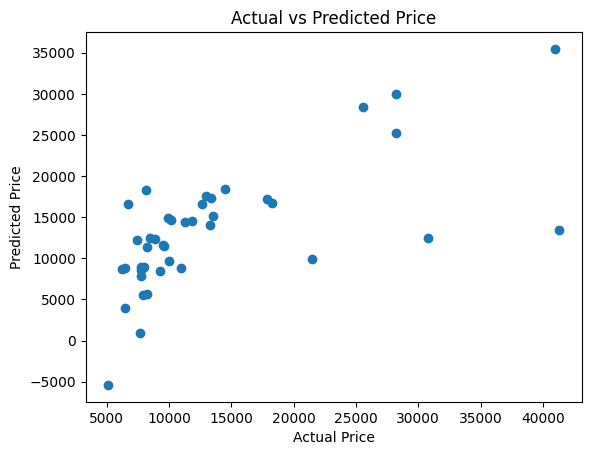

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

Interpret the Results

Analyze the coefficients and how each feature impacts the price.

In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                 Coefficient
wheelbase         128.951386
carlength        -303.040272
carwidth          802.508872
carheight        -683.048500
curbweight         19.967211
...                      ...
fuelsystem_idi   4625.910451
fuelsystem_mfi  -4372.927187
fuelsystem_mpfi  3065.465993
fuelsystem_spdi  1128.129114
fuelsystem_spfi -1168.825873

[193 rows x 1 columns]


In [ ]:
# Extract coefficients and feature names
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

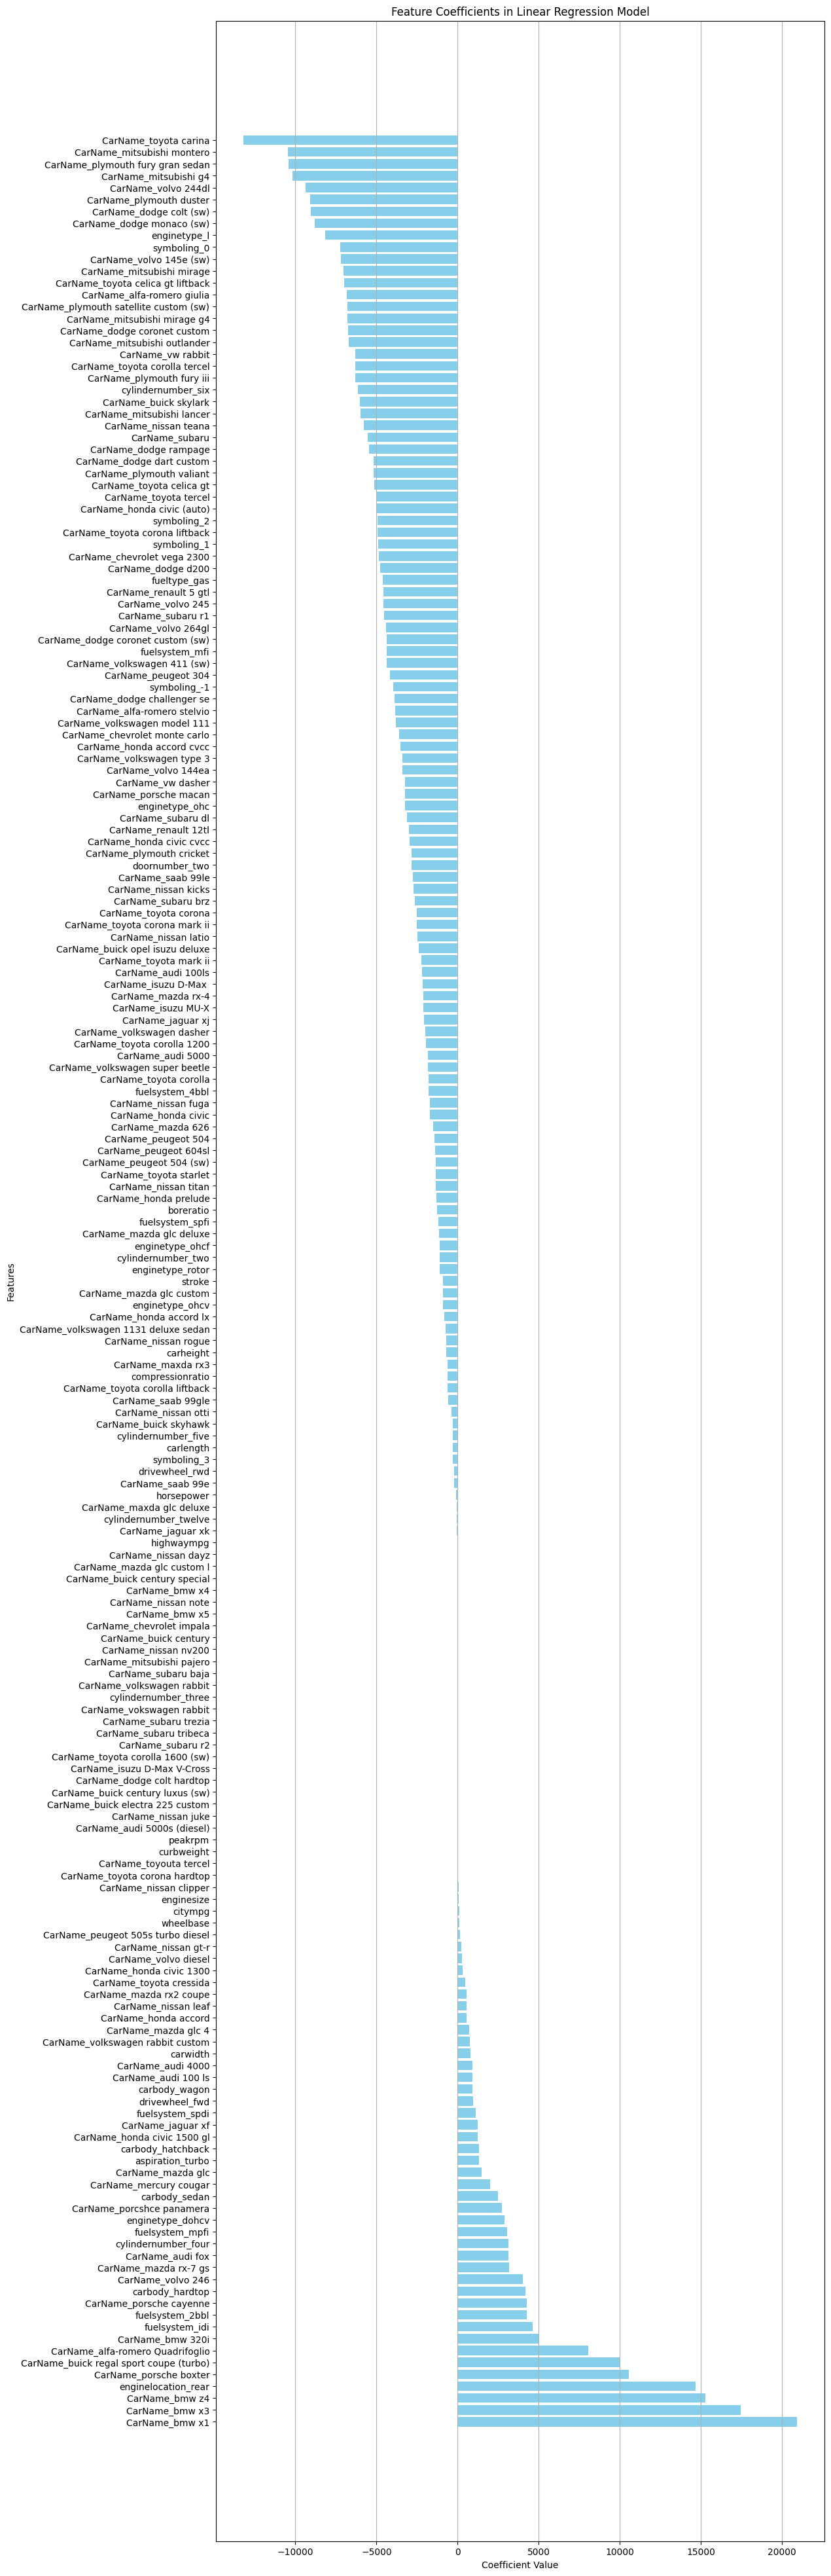

In [ ]:
import matplotlib.pyplot as plt

# Plot coefficients
plt.figure(figsize=(12, 50))
plt.barh(coefficients.index, coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Coefficients in Linear Regression Model')
plt.grid(axis='x')
plt.show()

-------------

Re training the model for better performance

In [ ]:
d = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')

In [ ]:
d.drop(['drivewheel','car_ID','symboling','CarName','enginelocation','fuelsystem'], axis=1, inplace=True)

In [ ]:
# List of categorical columns
categorical_col = ['fueltype','aspiration','doornumber','carbody','enginetype','cylindernumber']

# Apply one-hot encoding
d = pd.get_dummies(d, columns=categorical_col, drop_first=True)

# Check the new dataframe
d.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,False,False,True,False,False,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,False,False,True,False,False,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,False,False,True,False,False,False,True,False,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,True,False,False,False,False,True,False,False,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
X = d.drop('price', axis=1)  # Independent variables
y = d['price']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 8223179.741160032
R-squared: 0.8958353064674087


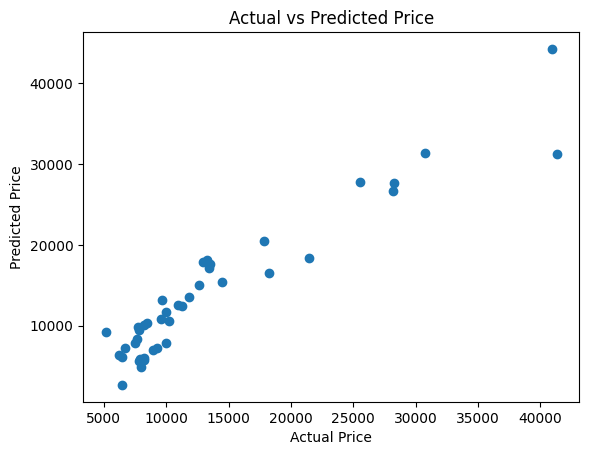

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                        Coefficient
wheelbase                 60.851923
carlength                -79.457263
carwidth                 320.088116
carheight                179.836262
curbweight                 3.709566
enginesize               128.435967
boreratio              -1556.897533
stroke                 -4252.764432
compressionratio         628.859473
horsepower                42.022755
peakrpm                    2.388748
citympg                 -295.428789
highwaympg               283.445381
fueltype_gas            5503.809761
aspiration_turbo        1169.669615
doornumber_two          -302.405976
carbody_hardtop        -3615.268772
carbody_hatchback      -3775.065220
carbody_sedan          -3032.079552
carbody_wagon          -4474.035953
enginetype_dohcv      -13969.235271
enginetype_l            2070.352895
enginetype_ohc          3758.608901
enginetype_ohcf         3226.585290
enginetype_ohcv        -5423.517938
enginetype_rotor        -711.303112
cylindernumber_five    -8875

In [ ]:
# Extract coefficients and feature names
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)


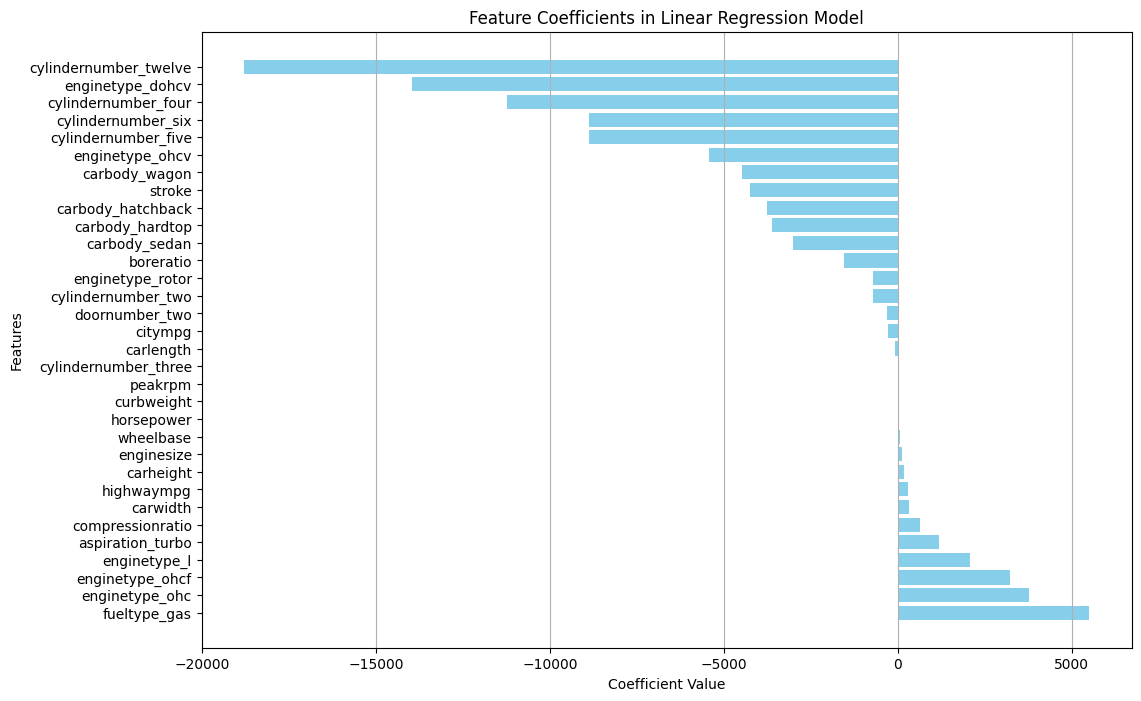

In [ ]:
import matplotlib.pyplot as plt

# Plot coefficients
plt.figure(figsize=(12, 8))
plt.barh(coefficients.index, coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Coefficients in Linear Regression Model')
plt.grid(axis='x')
plt.show()
